In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv


In [85]:
# load the .env file variables
load_dotenv()

# Spotify API credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [86]:
# Importar spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [87]:
# Seleccionar artista
id_artist = "7Ln80lUS6He07XvHI8qqHH"
# Seleccionar tracks
top_tracks = spotify.artist_top_tracks(id_artist)

songs = []
for track in top_tracks['tracks']:
    songs.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })


In [102]:
df_songs = pd.DataFrame(songs)
df_songs_sorted = df_songs.sort_values(by='popularity', ascending=True)
df_songs_sorted.head(3)

name  popularity  duration_min
9                Arabella          75      3.455933
8              Knee Socks          75      4.292717
6  Fluorescent Adolescent          77      3.064883

## Análisis de los datos

<Axes: xlabel='duration_min', ylabel='popularity'>

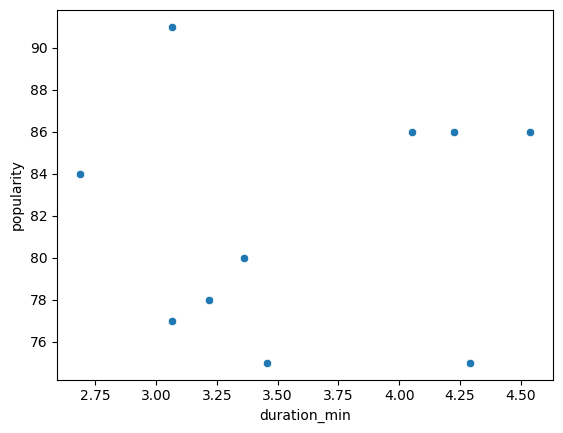

In [104]:
# No realicé más personalizaciones porque no se visualizaban en el gráfico
sns.scatterplot(data = df_songs_sorted, x = "duration_min", y = "popularity")

No se observa ninguna correlación entre la duración de la canción y su popularidad.